# This notebook generates Figure 03, where we show a prototypical measurement of the critical current during irradiation.

In [10]:
%pylab notebook
import sys, os, importlib
outputDirectory = '../figures/raw/'
parentDirectory = '/Users/alexisdevitre/Documents/GitHub/2024-Beam-On-Not/data/'
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')

import seaborn as sns, hts_dosecalculations as dose, default_figure_style as dfs

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Figure description

This cell generated figure 03, where a critical current measurement is taken during irradiation. The beam current, measured on FFJ37 for a 30 nA x 1200 keV proton exposure, is plotted as a function of time. The Faraday cup is retracted at t = 9.7 s, allowing the beam to reach the tape. The beam current is stable after 1-2 seconds. The large peaks mark the start and end of the IV curve, which perturbs the beam current measurement. Finally, the Faraday cup is reinserted, blocking the beam. Reference measurements are taken before and after the exposure (not shown).

<IPython.core.display.Javascript object>


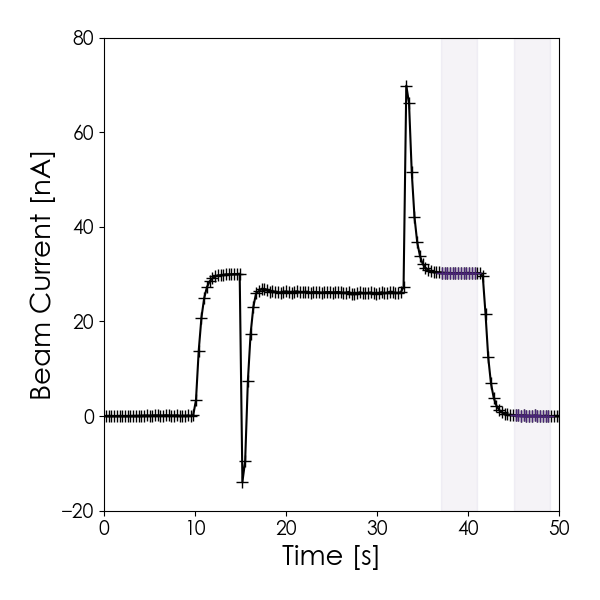

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
palette = sns.color_palette('viridis', 9)

ivpath = parentDirectory+'Ic/f37/'

ibdata = dose.loadBeamCurrent(ibpath=parentDirectory+'flux/f37.xlsx', sname='1200keV-step1')
ibdata['time_s'] -= 9580
ax.plot(ibdata.time_s, ibdata.ibeam_nA, marker='+', color='k')

for xmin, xmax in zip([37, 45], [41, 49]):
    ax.axvspan(xmin, xmax, color=palette[0], alpha=.05)
    cut = (xmin < ibdata.time_s) & (ibdata.time_s < xmax)
    ax.plot(ibdata.time_s[cut], ibdata.ibeam_nA[cut], marker='+', color=palette[0], linestyle='None')

#
# Uncomment to highlight the Ic measurements taken before and after the exposure.
#
#ax.axvspan(37, 41, color='k', alpha=.05)
#cut = (37 < ibdata.time_s) & (ibdata.time_s < 41)
#ax.plot(ibdata.time_s[cut], ibdata.ibeam_nA[cut], marker='+', color='b', linestyle='None')
#

ax.set_ylabel('Beam Current [nA]')
ax.set_xlabel('Time [s]')
ax.set_xlim(0, 50)
ax.set_ylim(-20, 80)
fig.tight_layout()

plt.savefig(outputDirectory+'prototypical.svg')